<a href="https://colab.research.google.com/github/SovetovAleksey/Numpy-Pandas-Matplotlib-Scikit-learn/blob/8_lesson_TSNE_KMeans/8_lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Задание 1**
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [6]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = pd.DataFrame(boston['data'], columns = boston['feature_names'])
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [38]:
y = pd.DataFrame(boston['target'], columns = ['price'])
y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, random_state = 42)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

In [31]:
from sklearn.manifold import TSNE

In [32]:
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)

In [33]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


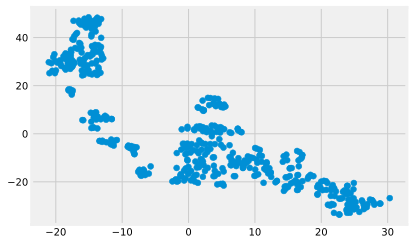

In [47]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### **Задание 2**
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [42]:
from sklearn.cluster import KMeans

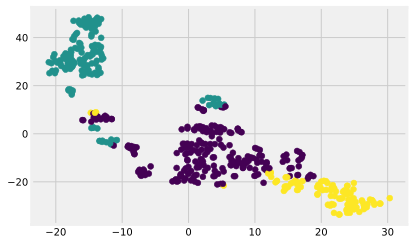

In [52]:
kmeans = KMeans(n_clusters = 3, random_state = 42, max_iter = 100)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)

plt.show()

In [56]:
print(y_train[labels_train == 0].mean())
print(y_train[labels_train == 1].mean())
print(y_train[labels_train == 2].mean())

price    24.525862
dtype: float64
price    16.275641
dtype: float64
price    28.223469
dtype: float64


In [57]:
print(X_train['CRIM'][labels_train == 0].mean())
print(X_train['CRIM'][labels_train == 1].mean())
print(X_train['CRIM'][labels_train == 2].mean())

0.39718090517241394
10.539185641025641
0.07128102040816328


### ***Задание 3**
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [59]:
labels_test = kmeans.fit_predict(X_test_scaled)
labels_test

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1],
      dtype=int32)

In [62]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
X_test_tsne

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


array([[  208.34424 ,  1081.662   ],
       [ -613.66406 ,   -27.573435],
       [  466.94867 ,  -584.1029  ],
       [  735.6781  ,   773.8314  ],
       [  629.49176 ,   212.45985 ],
       [ -857.24414 ,   422.71442 ],
       [ -163.17616 ,  -221.71169 ],
       [ -198.50464 ,   250.95616 ],
       [ -221.40382 ,   734.64966 ],
       [ -370.06363 , -1092.4437  ],
       [  231.75508 ,   475.10602 ],
       [ -671.8623  ,   974.08154 ],
       [  282.5432  ,  -109.39339 ],
       [ 1165.4221  ,   278.04645 ],
       [  299.3612  , -1135.6002  ],
       [-1099.086   ,  -254.62233 ],
       [  977.4263  ,  -781.98157 ],
       [ -618.7325  ,  -590.0894  ],
       [  890.91766 ,  -234.98404 ],
       [  -33.089   ,  -665.11896 ]], dtype=float32)

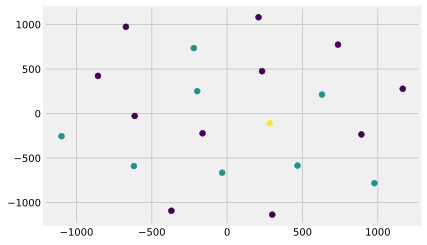

In [63]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c = labels_test)

plt.show()

In [64]:
print(y_test[labels_test == 0].mean())
print(y_test[labels_test == 1].mean())
print(y_test[labels_test == 2].mean())

price    23.954545
dtype: float64
price    17.025
dtype: float64
price    7.0
dtype: float64


In [65]:
print(X_test['CRIM'][labels_test == 0].mean())
print(X_test['CRIM'][labels_test == 1].mean())
print(X_test['CRIM'][labels_test == 2].mean())

0.13808727272727273
4.74167375
45.7461
